### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Aula 06__

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import binom

# __Capítulo 3 - Modelos analíticos para fenômenos aleatórios__

## __3.2 - Principais distribuições de probabilidade__ <a name="section_32"></a>

[3.2.1 - Distribuição Normal](#section_321)  
[3.2.2 - Distribuição Lognormal](#section_322)    
[3.2.3 - Distribuição Binomial (Sequência de Bernoulli)](#section_323)  
[3.2.4 - Distribuição Geométrica](#section_324)   
[3.2.5 - Distribuição Binomial Negativa](#section_325)  
[3.2.6 - Distribuição de Poisson](#section_326)  
[3.2.7 - Distribuição Exponencial](#section_327)   
[3.2.8 - Distribuição Gama](#section_328)  
[3.2.9 - Distribuição Hipergeometrica](#section_329)   
[3.2.10 - Distribuição Beta](#section_3210)   

### 3.2.1 - Distribuição Normal  <a name="section_321"></a>

* Também chamada de __Curva de Gauss__.

* É a mais utilizada das distribuições.

* Parâmetros: $\mu$ = média e $\sigma$ = desvio padrão.

* Sua FDP é dada por $N(\mu,\sigma)$:

$$ f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]} \qquad -\infty < x < +\infty$$

* A figura abaixo mostra os efeitos da variação dos parâmetros $\sigma$ (a) e $\mu$ (b) sobre a FDP da distribuição normal.


<img src="./images3/normal1.jpg" alta="Distribuição Normal: variação de sigma e de mu" style="width:800px"/>

Fonte: ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Distribuição normal padrão:

A distribuição normal pode ser padronizada através da utilização da variável $S$:

$$ s = \frac{(x-\mu)}{\sigma} $$.

A variável $S$ é uma variável aleatória de média $\mu_S = 0$ e de variância unitária $\sigma_S^2 = 1$, cuja FDP é dada na forma:

$$ f_X(x) = \frac{1}{\sqrt{2 \pi}} \exp{\left[-\frac{1}{2} s^2\right]} \qquad -\infty < x < +\infty$$

A figura abaixo mostra um gráfico da função densidade de probabilidade da distribuição normal padronizada, onde $\Phi(s) = F_S(s)$:

<img src="./images3/normal_padronizada.jpg" alta="Distribuição Normal Padronizada" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

Em função do número de desvios padrões $\sigma$ considerados à esquerda e à direita da média $\mu = 0$, tem-se uma probabilidade (área sob a curva normal) de os dados estarem contidos neste intervalo, conforme é mostrado na figura abaixo.

<img src="./images3/normal_sigma.jpg" alta="Área sob a curva normal" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Cálculo de probabilidades

A probabilidade o evento $a \leq X \leq b$ será dada por:

$$ P(a \leq X \leq b) = \frac{1}{\sigma \sqrt{2 \pi}} \int_{a}^{b}\exp{\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]}dx$$

Esta integral representa a área sob a curva normal entre os pontos $x = a$ e $x = b$, conforme mostrado na figura abaixo.

Esta integral não possui solução analítica, devendo se valor ser obtido através da utilização de métodos numéricos ou alguma aproximação. Tabelas para a função de distribuição acumulada (FDA) da distribuição normal padronizada costumam estar disponíveis nos apêndices de livros de Estatística e Probabilidade.

<img src="./images3/normal_area.jpg" alta="Área sob a curva normal entre os pontos a e b" style="width:474px"/>

Fonte: Adaptada de ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

Usando-se a distribuição  normal padrão, tem-se que:

$$ s_a = \frac{a - \mu}{\sigma} \quad \text{e} \quad s_b = \frac{b - \mu}{\sigma}$$

Logo:

$$ P(a \leq X \leq b) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)$$


#### Exemplo 3.5 - Precipitação pluviométrica em uma bacia de captação

A precipitação pluviométrica anual em uma bacia de captação é estimada ter uma distribuição normal com $N(1500 mm, 375mm)$.  
a) Qual a probabilidade de que em um ano futuro a precipitação anual será entre $1000 mm$ e $1800 mm$?

__Solução__:

$$P(1000 \leq X \leq 1800) = \Phi\left(\frac{1800 - 1500}{375}\right) - \Phi\left(\frac{1000 - 1500}{375}\right) = 0,7881 - 0,0912 = 0,6969 = 69,69\%$$

In [73]:
# Dados de entrada:
x_mean = 1500 # mm
x_std = 375 # mm
a = 1000 # mm
b = 1800 # mm
pa = norm.cdf(a, x_mean, x_std)
pb = norm.cdf(b, x_mean, x_std) 
px = pb - pa
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Probabilidade acumulada de a = 0.0912
Probabilidade acumulada de b = 0.7881
Probabilidade do evento 1000 mm < X < 1800 mm = 0.6969


b) Qual a probabilidade de que a precipitação anual será de pelo menos $750 mm$?

$$P(X \geq 750) = 1 - P(X < 750) =1 - \Phi\left(\frac{750 - 1500}{375}\right) = 1 - 0,02275 = 0,9772 = 97,72\%$$

In [74]:
p750 = norm.cdf(750, x_mean, x_std)
pxge750 = 1 - p750
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Probabilidade acumulada de X < 750 mm = 0.0228
Probabilidade do evento X >= 750 mm = 0.9772


c) Qual a precipitação anual que tem uma probabilidade de ocorrência de pelo menos 10%?

$$ P(X \leq x) = 10\% \rightarrow \Phi \left(\frac{x - 1.500}{375} \right) = 0,10 \rightarrow \frac{x-1.500}{375}=-1,2816$$

$$ x = 1.500 - 1,2816 . 375 = 1.019 mm$$

In [75]:
s = norm.ppf(0.10,0.00,1.00)
x = x_mean + s * x_std
print("Variável normal padronizada s tal que P(S<s)=10% = {0:0.4f}".format(s))
print("Variavel normal x, tal que s = -1,2816 = {0:0.4f} mm".format(x))

Variável normal padronizada s tal que P(S<s)=10% = -1.2816
Variavel normal x, tal que s = -1,2816 = 1019.4182 mm


Ou, de forma direta:

In [76]:
x = norm.ppf(0.10, x_mean, x_std)
print("Variavel normal x, tal que P(X<x)=10% = {0:0.4f} mm".format(x))

Variavel normal x, tal que P(X<x)=10% = 1019.4182 mm


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.2 - Distribuição Lognormal <a name="section_322"></a>

* Uma variável aleatória $X$ possui uma distribuição lognormal se o logaritmo neperiano $ln(X)$ possui distribuição normal.

* A distribuição lognormal é útil de ser empregada quando todos os valores da variável aleatória $X$ forem positivos $(X>0)$.

* Os parâmetros de uma distribuição lognormal são  $\lambda$ e $\zeta$, onde: 

* $\lambda = E[ln(x)]$, ou seja, a média do logarítmo neperiano de $X$.

* $\zeta = \sqrt{\{Var[ln(X)]\}}$, ou seja, o desvio padrão do logaritmo neperiano de $X$

* A FDP de uma variável aleatória lognormal $X$ será dada por:

$$ f_X(x) = \frac{1}{\sqrt{2 \pi}\zeta x } \exp{-\frac{1}{2}\left(\frac{ln(x) - \lambda}{\zeta}\right)^2} \qquad 0 < x < +\infty$$


A figura abaixo apresenta o aspecto da função FDP para uma variável aleatória lognormal, para diversos valores do parâmetro de dispersão $\zeta$.

<img src="./images3/lognormal.jpg" alt="FDP para uma variável aleatória lognormal." style="width:474px"/>

Fonte: ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.

#### Parâmentros da distribuição lognormal

Uma vez conhecidos os parâmetros média $\mu$ e desvio padrão $\sigma$ da variável $X$, os parâmetros da distribuição lognormal podem ser obtidos a partir das seguintes equações:

* a) Média $\lambda$:

$$ \lambda = ln\mu - \frac{1}{2}\zeta^2$$.

* b) Variância $\zeta$:

$$ \zeta^2 = ln\left( \frac{\sigma^2}{\mu^2} + 1 \right)$$

* c) Mediana $x_m$:

$$x_m = \frac{\mu}{\sqrt{1+\delta^2}}$$

* d) Nos casos em que:

$$ \delta = \frac{\sigma}{\mu} \le 0,30 \quad \rightarrow \quad \zeta \approxeq \delta $$

#### Exemplo 3.6 - Precipitação em uma bacia de captação: modelo com distribuição lognormal

A precipitação pluviométrica anual em uma bacia de captação possui média $\mu = 1.500 mm$ e desvio padrão $\sigma = 375 mm$. Considerar, agora, que o modelo de distribuição de probabilidade da precipitação anual seja lognormal.  
a) Qual a probabilidade de que em um ano futuro a precipitação anual será entre $1000 mm$ e $1800 mm$?

__Solução__:

Cálculo dos parâmetros da distribuição lognormal:

$$ \delta = \frac{375}{1.500} = 0,25 $$

$$ \zeta^2 = ln\left( \frac{\sigma^2}{\mu^2} + 1 \right) = ln\left( 0,25^2 + 1 \right) = 0,0606$$

$$ \zeta = \sqrt{0,0606}= 0,2462$$

Note-se que para $\delta < 0,30 \rightarrow \zeta \approxeq \delta$

$$ \lambda = ln\mu - \frac{1}{2}\zeta^2 = ln(1500) - \frac{1}{2}(0,2462)^2 = $$.

$$P(1000 \leq X \leq 1800) = \Phi\left(\frac{1800 - 1500}{375}\right) - \Phi\left(\frac{1000 - 1500}{375}\right) = 0,7881 - 0,0912 = 0,6969 = 69,69\%$$

In [77]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Cálculo das probabilidades utilizando a distribuição normal de ln(x)
sa = (np.log(1000.00)-lambdax)/zetax
sb = (np.log(1800.00)-lambdax)/zetax
pa = norm.cdf(sa, 0, 1)
pb = norm.cdf(sb, 0, 1)
px = pb - pa
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Probabilidade acumulada de a = 0.0638
Probabilidade acumulada de b = 0.8061
Probabilidade do evento 1000 mm < X < 1800 mm = 0.7423


Ou usando diretamente a FDA da distribução lognormal:

In [78]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo das probabilidades utilizando diretamente a distribuição lognormal
a= 1000.00
b= 1800.00
pa = lognorm.cdf(a, s, loc, scale)
pb = lognorm.cdf(b, s, loc, scale)
px = pb - pa
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Parâmetro loc = {0:0.4f}".format(loc))
print("Parâmetro s = {0:0.4f}".format(zetax))
print("Parâmetro scale = {0:0.4f}".format(scale))
print("Probabilidade acumulada de a = {0:0.4f}".format(pa))
print("Probabilidade acumulada de b = {0:0.4f}".format(pb))
print("Probabilidade do evento 1000 mm < X < 1800 mm = {0:0.4f}".format(px))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Parâmetro loc = 0.0000
Parâmetro s = 0.2462
Parâmetro scale = 1455.2138
Probabilidade acumulada de a = 0.0638
Probabilidade acumulada de b = 0.8061
Probabilidade do evento 1000 mm < X < 1800 mm = 0.7423


b) Qual a probabilidade de que a precipitação anual será de pelo menos $750 mm$?

$$P(X \geq 750) = 1 - P(X < 750) =1 - \Phi\left(\frac{ln(750) - 7,2820}{0,2462}\right) = 1 - 0,0036 = 0,9964 = 99,64\%$$

In [79]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Cálculo das probabilidades utilizando a distribuição normal de ln(x)
s750 = (np.log(750)-lambdax)/zetax
p750 = norm.cdf(s750, 0, 1)
pxge750 = 1 - p750
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Probabilidade acumulada de X < 750 mm = 0.0036
Probabilidade do evento X >= 750 mm = 0.9964


Ou usando diretamente a FDA da distribução lognormal:

In [80]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo das probabilidades utilizando diretamente a distribuição lognormal
p750 = lognorm.cdf(750.00, s, loc, scale)
pxge750 = 1 - p750
print("Parâmetro lambda = {0:0.4f}".format(lambdax))
print("Parâmetro zeta = {0:0.4f}".format(zetax))
print("Parâmetro loc = {0:0.4f}".format(loc))
print("Parâmetro s = {0:0.4f}".format(zetax))
print("Parâmetro scale = {0:0.4f}".format(scale))
print("Probabilidade acumulada de X < 750 mm = {0:0.4f}".format(p750))
print("Probabilidade do evento X >= 750 mm = {0:0.4f}".format(pxge750))

Parâmetro lambda = 7.2829
Parâmetro zeta = 0.2462
Parâmetro loc = 0.0000
Parâmetro s = 0.2462
Parâmetro scale = 1455.2138
Probabilidade acumulada de X < 750 mm = 0.0036
Probabilidade do evento X >= 750 mm = 0.9964


c) Qual a precipitação anual que tem uma probabilidade de ocorrência de pelo menos 10%?

$$ P(X \leq x) = 10\% \rightarrow \Phi \left(\frac{ln(x_{10\%} - 7,2829}{0,2462} \right) = 0,10 \rightarrow \frac{ln(x)-7,2829}{0,2462}=-1,2816$$

$$ ln(x) = 7,2829 - 1,2816 . 0,2462 = 6,9674 $$

$$ x = \exp(6,9674) = 1.061,42 mm $$

In [81]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
s = norm.ppf(0.10,0.00,1.00)
lnx = lambdax + s * zetax
x = np.exp(lnx)
print("Variável normal padronizada s tal que P(S<s)=10% = {0:0.4f}".format(s))
print("ln(x) correspondente a s(10%) = {0:0.4f}".format(lnx))
print("Variavel normal x, tal que s = -1,2816 = {0:0.4f} mm".format(x))

Variável normal padronizada s tal que P(S<s)=10% = -1.2816
ln(x) correspondente a s(10%) = 6.9674
Variavel normal x, tal que s = -1,2816 = 1061.4207 mm


Ou, de forma direta:

In [82]:
# Parâmetros da distribuição lognormal
x_mean = 1500 # mm
x_std = 375 # mm
delta = x_std / x_mean
zetax = np.sqrt(np.log(delta**2 +1))
lambdax = np.log(x_mean)-0.5*zetax**2
# Parâmetros para scipy.stats lognorm.cdf
s = zetax
scale =  np.exp(lambdax)
loc= 0.00
# Cálculo de x
x = lognorm.ppf(0.10, s, loc, scale)
print("Variavel normal x, tal que P(X<x)=10% = {0:0.4f} mm".format(x))

Variavel normal x, tal que P(X<x)=10% = 1061.4207 mm


[Retornar à lista de distribuições de probabilidade](#section_32) 

### 3.2.3 - Distribuição Binomial (Sequência de Bernoulli)  <a name="section_323"></a>

#### Sequência de Bernoulli:

1. Cada tentaviva possui apenas dois resultados possíveis: a __ocorrência__ $(p)$ ou a __não-ocorrência__ $(q)$ do evento.

2. A probabilidade de ocorrência do evento em cada tentativa é __constante__.

3. As tentativas são __estatisticamente independentes__.

#### Distribuição Binomial:

* A probabilidade de acontecerem $x$ ocorrências, em $n$ tentativas, com uma probabilidade $p$ em cada tentativa é:

$$P(X=x) = \binom{n}{x} p^x (1-p)^{n-x} \qquad x = 0, 1, 2, 3, ..., n$$

Onde:

$$ \binom{n}{x} = \frac{n!}{x!(n-x)!} $$

É a combinação de $n$ elementos, $x$ a $x$.

* Na sequência de Bernoulli as tentativas devem ser discretas.

* Porém, problemas de tempo ou espaço contínuos podem ser resolvidos dividindo-se o tempo (ou o espaço) em intervalos finitos e admitindo-se apenas a ocorrência ou a não-ocorrência do evento em cada intervalo.

#### Exemplo 3.7 - Cheia máxima anual - Distribuição Binomial

No planejamento de um sistema de controle de enchentes é de interesse conhecer-se a ocorrência da máxima cheia anual de um  rio. A probabilidade de a cheia anual exceder um nível $h_0$ é de $0,10$, em um ano.

a)Qual a probabilidade de que o nível $h_0$ será excedido uma vez nos próximos cinco anos?

__Solução:__

$p = 0,10$  
$1 - p = 0,90$  
$n = 5$  
$x = 1$  

$$P(X=1) = \binom{5}{1} (0,1)^1(0,9)^4 = 0,3280=32,80\%$$



In [83]:
# Entrada de dados
n = 5
p = 0.10
x = 1
# Cálculo da probabilidade de que ocorra uma cheia em 5 anos
px1 = binom.pmf(x,n,p)
print("Probabilidade de X=1, em 5 anos = {0:0.4f}".format(px1))

Probabilidade de X=1, em 5 anos = 0.3280


b)Qual a probabilidade de que haverá no máximo uma cheia superior a $h_0$ nos próximos cinco anos?

__Solução:__

$$P(X \leq 1) = P(X=0) + P(X = 1) = \binom{5}{0} (0,1)^0(0,9)^5 + \binom{5}{1} (0,1)^1(0,9)^4 = 0,5905 + 0,3280 = 0,9185=91,85\%$$

Esta é a possibilidade de haver nenhuma ou apenas uma cheia em 5 anos.

In [84]:
# Entrada de dados
n = 5
p = 0.10
# Cálculo da probabilidade de que ocorra uma cheia em 5 anos
px0 = binom.pmf(0,n,p)
px1 = binom.pmf(1,n,p)
pxmax1 = px0 + px1 
print("P(X=0) = {0:0.4f}".format(px0))
print("P(X=1) = {0:0.4f}".format(px1))
print("Probabilidade de  X ser no máximo igual a 1, em 5 anos = {0:0.4f}".format(pxmax1))

P(X=0) = 0.5905
P(X=1) = 0.3280
Probabilidade de  X ser no máximo igual a 1, em 5 anos = 0.9185


A figura abaixo mostra o gráfico da distribuição binomial para os parâmetros $p = 0,10$ e $n = 5$, observando-se que: $C_n^x = \binom{n}{x}$, ou seja, combinação de $n$ elementos, $x$ a $x$.

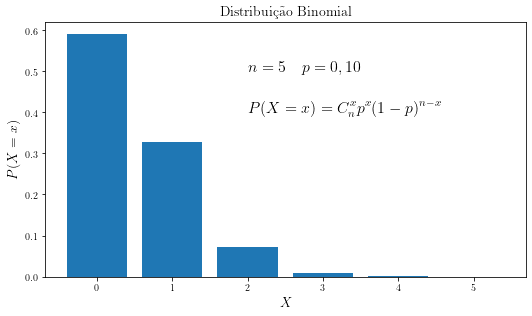

In [101]:
# Parâmetros n e p da distribuição binomial
n = 5
p = 0.10
# Definindo os valores de x
x_values = list(range(n + 1))
# Lista com os valores de pmf para cada valor de x
dist = [binom.pmf(x, n, p) for x in x_values ]
# Gerando o gráfico da distribuição binomial para n = 5 e p = 0,10
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.bar(x_values, dist)
ax.set_ylabel(r'$P(X=x)$', fontsize=14)
ax.set_xlabel(r'$X$', fontsize=14)
ax.set_title('Distribuição Binomial', fontsize=14)
ax.text(2, 0.5, r'$\displaystyle n = 5 \quad p = 0,10$', fontsize = 16)
ax.text(2, 0.4, r'$\displaystyle P(X=x) = C_{n}^{x} p^x (1-p)^{n-x}$', fontsize = 16)
fig.tight_layout()

[Retornar à lista de distribuições de probabilidade](#section_32) 

## __Bibliografia__

* __Livros__
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume I:  basic principles. New  York, John Wiley & Sons, 1975.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and pesign. Volume II: decision, risk and reliability. New  York, John Wiley & Sons, 1984.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.
* BECK, A. T. Confiabilidade e segurança das  estruturas. Rio de Janeiro, Elsevier, 2019.
* HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.
* MELCHERS, R.E., BECK, A. T.; Structural reliability analysis and prediction. 3rd ed. John Wiley and Sons, 2018, 514p.

[Voltar ao início do item 3.2](#section_32)